# Campaign Finance Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Files

In [2]:
sen_2016 = pd.read_csv('../data/individual_contributions/senate/sen_2016_individ_donations.csv')
sen_2014 = pd.read_csv('../data/individual_contributions/senate/sen_2014_individ_donations.csv')
sen_2012 = pd.read_csv('../data/individual_contributions/senate/sen_2012_individ_donations.csv')
sen_2010 = pd.read_csv('../data/individual_contributions/senate/sen_2010_individ_donations.csv')
sen_2008 = pd.read_csv('../data/individual_contributions/senate/sen_2008_individ_donations.csv')
sen_2006 = pd.read_csv('../data/individual_contributions/senate/sen_2006_individ_donations.csv')
sen_2004 = pd.read_csv('../data/individual_contributions/senate/sen_2004_individ_donations.csv')
sen_2002 = pd.read_csv('../data/individual_contributions/senate/sen_2002_individ_donations.csv')
sen_2000 = pd.read_csv('../data/individual_contributions/senate/sen_2000_individ_donations.csv')
sen_1998 = pd.read_csv('../data/individual_contributions/senate/sen_1998_individ_donations.csv')
sen_1996 = pd.read_csv('../data/individual_contributions/senate/sen_1996_individ_donations.csv')
sen_1994 = pd.read_csv('../data/individual_contributions/senate/sen_1994_individ_donations.csv')
sen_1992 = pd.read_csv('../data/individual_contributions/senate/sen_1992_individ_donations.csv')
sen_1990 = pd.read_csv('../data/individual_contributions/senate/sen_1990_individ_donations.csv')

In [3]:
congr_2016 = pd.read_csv('../data/individual_contributions/house/congr_2016_individ_donations.csv')
congr_2014 = pd.read_csv('../data/individual_contributions/house/congr_2014_individ_donations.csv')
congr_2012 = pd.read_csv('../data/individual_contributions/house/congr_2012_individ_donations.csv')
congr_2010 = pd.read_csv('../data/individual_contributions/house/congr_2010_individ_donations.csv')
congr_2008 = pd.read_csv('../data/individual_contributions/house/congr_2008_individ_donations.csv')
congr_2006 = pd.read_csv('../data/individual_contributions/house/congr_2006_individ_donations.csv')
congr_2004 = pd.read_csv('../data/individual_contributions/house/congr_2004_individ_donations.csv')
congr_2002 = pd.read_csv('../data/individual_contributions/house/congr_2002_individ_donations.csv')
congr_2000 = pd.read_csv('../data/individual_contributions/house/congr_2000_individ_donations.csv')
congr_1998 = pd.read_csv('../data/individual_contributions/house/congr_1998_individ_donations.csv')
congr_1996 = pd.read_csv('../data/individual_contributions/house/congr_1996_individ_donations.csv')
congr_1994 = pd.read_csv('../data/individual_contributions/house/congr_1994_individ_donations.csv')
congr_1992 = pd.read_csv('../data/individual_contributions/house/congr_1992_individ_donations.csv')
congr_1990 = pd.read_csv('../data/individual_contributions/house/congr_1990_individ_donations.csv')

In [38]:
sen_records = [
    sen_2016, sen_2014, sen_2012, sen_2010, sen_2008, sen_2006, sen_2004, sen_2002, sen_2000,
    sen_1998, sen_1996, sen_1994, sen_1992, sen_1990]
num_sen_records = [round(data.shape[0]/1_000_000, 2) for data in sen_records]

In [41]:
congr_records = [
    congr_2016, congr_2014, congr_2012, congr_2010, congr_2008, congr_2006, congr_2004, congr_2002, congr_2000,
    congr_1998, congr_1996, congr_1994, congr_1992, congr_1990]
num_congr_records = [round(data.shape[0]/1_000_000, 2) for data in congr_records]

In [52]:
years = ['16', '14', '12', '10', '08', '06', '04', '02', '00', '98', '96', '94', '92', '90']
all_records = pd.DataFrame(num_sen_records, columns=['Senate'], index=years)
all_records['Congress'] = pd.DataFrame(num_congr_records, columns=['Congress'], index=years)
all_records

,Senate,Congress
16,0.22,0.24
14,0.46,0.79
12,1.63,1.64
10,0.61,0.96
08,1.73,1.49
06,0.51,0.77
04,0.72,0.66
02,0.41,0.57
00,0.56,0.60
98,0.31,0.42


In [43]:
all_records.sum()

Senate      8.31
Congress    9.40
dtype: float64

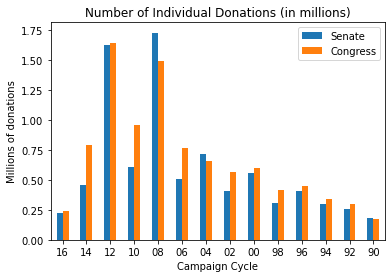

In [53]:
all_records.plot(kind='bar')
plt.xticks(rotation = 0)
plt.title("Number of Individual Donations (in millions)")
plt.ylabel("Millions of donations")
plt.xlabel("Campaign Cycle")
plt.legend();

### Pre-processing

In [9]:
# def clean_df(df):
#     df['first_last_party'] = [full_name[:-4] for full_name in df['first_last_party']]
#     df['dist_id_run_for'] = [office[:2] for office in df['dist_id_run_for']]
#     df['recip_code'] = [code[-1] for code in df['recip_code']]
#     df.rename(columns={'first_last_party':'candidate_name', 'dist_id_run_for':'state_run_for'}, inplace=True)
#     df['date_donated'] = pd.to_datetime(df['date_donated'])
#     return df